In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from rdkit import Chem
import pandas as pd
from predict_tautomer import get_taut_data
import mols2grid

In [3]:
def construct_data(out_data):
    new_data = []
    for info in out_data:
        # if info["label"] == "high_energy":
        #     continue
        new_data.append([Chem.MolFromSmiles(info["tsmi"]), info["tsmi"], info["score"], info["label"]])
    df_data = pd.DataFrame(new_data)
    df_data.columns = ["tmol", "tsmi", "score", "label"]
    return df_data

In [8]:
energy_cutoff = 2.76
cutmol = False
num_confs = 100
ionization=False
ph = 7.0
tph = 1.0

In [9]:
smi = 'Cn1c(=O)c2[nH]cnc2n(C)c1=O'
smi = 'Cc1c2c([nH]n1)OC(=C([C@@]2(c3cc(cc(c3)N4CCCC4)C(F)(F)F)C(C)C)C#N)N'

smi = 'O=C(O)c1cncc(O)n1'

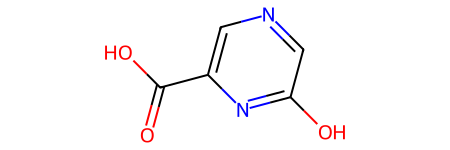

In [10]:
mol = Chem.MolFromSmiles( smi )
mol

In [11]:
data = get_taut_data(smi, cutmol, num_confs, energy_cutoff, ionization, ph, tph)

In [12]:
# data

In [13]:
df = construct_data(data)

In [16]:
df.head()

,tmol,tsmi,score,label
0,<rdkit.Chem.rdchem.Mol object at 0x15f9a3c30>,O=C(O)c1cncc(=O)[nH]1,0.0,low_energy
1,<rdkit.Chem.rdchem.Mol object at 0x15f9a3df0>,O=C(O)c1cncc(O)n1,1.91,low_energy
2,<rdkit.Chem.rdchem.Mol object at 0x15f9a3f40>,O=C1C=NCC(C(=O)O)=N1,12.1,high_energy
3,<rdkit.Chem.rdchem.Mol object at 0x15f9a3d80>,O=C1CN=CC(C(=O)O)=N1,13.01,high_energy


In [15]:
mols2grid.display(df, mol_col="tmol", subset=["img", "score", "label"], n_cols=3, size=(200, 200))

MolGridWidget()

In [89]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D


In [90]:
# Initialize the drawer with desired image size
drawer = rdMolDraw2D.MolDraw2DCairo(300, 300)

# Get the drawing options
options = drawer.drawOptions()
options.addAtomIndices = True  # Enable atom indices


In [91]:
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

In [72]:
mol = Chem.MolFromSmiles( "O=C(O)c1cncc(=O)[nH]1" )

In [73]:
mol = Chem.AddHs( mol )

In [74]:
# mol = Chem.RemoveAllHs(mol)

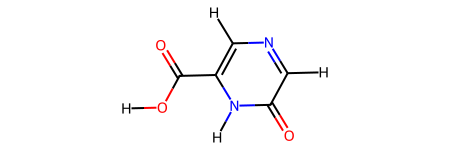

In [75]:
mol

In [92]:
img = Draw.MolToImage(mol, size=(300, 300), options=options)

In [94]:
img.show()

In [95]:
for at in mol.GetAtoms():
    print(at.GetNumExplicitHs(), at.GetNumImplicitHs(), at.GetSymbol())
    if at.GetIdx() == 9:
        
        at.SetFormalCharge(-1)
        # at.SetNumExplicitHs(1-1)
        

0 0 O
0 0 C
0 0 O
0 0 C
0 0 C
0 0 N
0 0 C
0 0 C
0 0 O
0 0 N
0 0 H
0 0 H
0 0 H
0 0 H


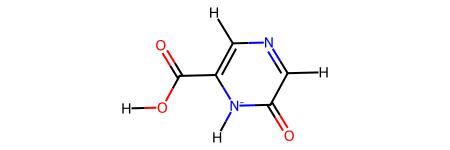

In [96]:
mol

In [81]:
Chem.MolFromSmiles(  )

In [86]:
Chem.MolToSmiles( mol )

'[H]OC(=O)c1c([H])nc([H])c(=O)[n-]1[H]'

In [97]:
emol = Chem.EditableMol(mol)
# Remove the second carbon atom (index 1)
emol.RemoveAtom(13)


In [98]:
nmol = emol.GetMol()

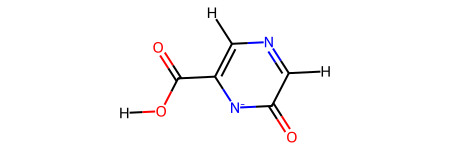

In [99]:
nmol

In [104]:
Chem.MolToSmiles(Chem.MolFromSmiles(Chem.MolToSmiles(nmol)))

'O=C(O)c1cncc(=O)[n-]1'

In [105]:
at.GetNeighbors()

(<rdkit.Chem.rdchem.Atom at 0x161259620>,)